<a href="https://colab.research.google.com/github/ealsk/2020_AI/blob/master/11_hello_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST 분류기**

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils 

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
28*28

784

In [5]:
Y_train.shape

(60000,)

In [6]:
Y_train[1]

0

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
28*28

784

In [9]:
Y_train[3]

1

In [10]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes) 

In [11]:
Y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
input_size = 784
batch_size = 100
hidden_neurons = 400
epochs = 8

In [13]:
model = Sequential()
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

In [14]:
model = Sequential()
model.add(Dense(classes, input_dim=input_size))
model.add(Activation('softmax'))

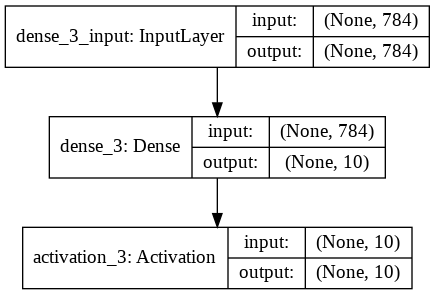

In [15]:
from keras.utils import plot_model
plot_model(model, to_file='model_mnist.png', show_shapes=True)

In [16]:
model.compile(loss='categorical_crossentropy',
    metrics=['accuracy'], optimizer='adadelta')

In [17]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/8
60000/60000 [==============================] - 1s 18us/step - loss: 0.5931 - accuracy: 0.8555
Epoch 2/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.3388 - accuracy: 0.9063
Epoch 3/8
60000/60000 [==============================] - 1s 15us/step - loss: 0.3101 - accuracy: 0.9141
Epoch 4/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.2964 - accuracy: 0.9174
Epoch 5/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.2882 - accuracy: 0.9206
Epoch 6/8
60000/60000 [==============================] - 1s 17us/step - loss: 0.2821 - accuracy: 0.9219
Epoch 7/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.2780 - accuracy: 0.9228
Epoch 8/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.2741 - accuracy: 0.9239


In [18]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
#Test accuracy: 0.983

10000/10000 [==============================] - 0s 20us/step

Test accuracy: 0.9243000149726868


##2 (정확도가 올라간 모델)

In [20]:
model = Sequential()
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

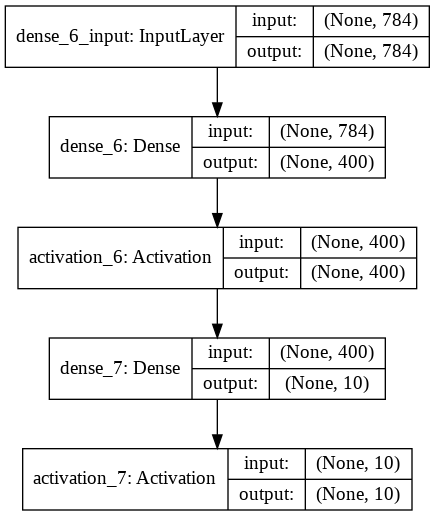

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model_mnist.png', show_shapes=True)

In [22]:
model.compile(loss='categorical_crossentropy',
    metrics=['accuracy'], optimizer='adadelta')

In [24]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/8
60000/60000 [==============================] - 5s 77us/step - loss: 0.2872 - accuracy: 0.9186
Epoch 2/8
60000/60000 [==============================] - 5s 76us/step - loss: 0.1254 - accuracy: 0.9637
Epoch 3/8
60000/60000 [==============================] - 5s 78us/step - loss: 0.0854 - accuracy: 0.9753
Epoch 4/8
60000/60000 [==============================] - 5s 76us/step - loss: 0.0653 - accuracy: 0.9809
Epoch 5/8
60000/60000 [==============================] - 5s 76us/step - loss: 0.0514 - accuracy: 0.9856
Epoch 6/8
60000/60000 [==============================] - 4s 75us/step - loss: 0.0413 - accuracy: 0.9881
Epoch 7/8
60000/60000 [==============================] - 5s 76us/step - loss: 0.0339 - accuracy: 0.9907
Epoch 8/8
60000/60000 [==============================] - 5s 75us/step - loss: 0.0277 - accuracy: 0.9926


In [25]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
#Test accuracy: 0.983

10000/10000 [==============================] - 0s 40us/step

Test accuracy: 0.9810000061988831
